 ### Simple Linear Regression (Using MedInc to predict House Value)

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load California Housing dataset
california = datasets.fetch_california_housing(as_frame=True)
df = california.frame  # Convert to Pandas DataFrame

df.head()  # Display first few rows


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


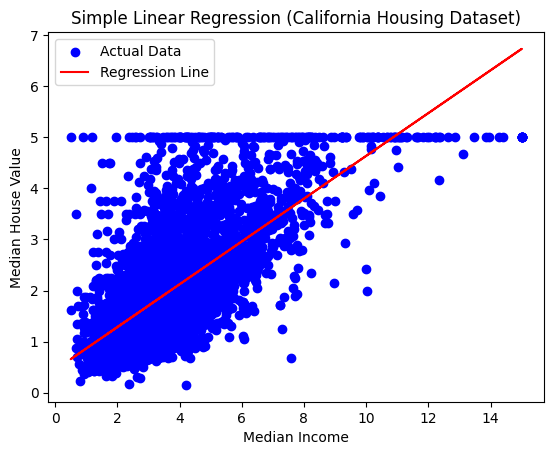

In [25]:

# Select one feature for simple regression
X = df[['MedInc']]  # Median income
y = df['MedHouseVal']  # Median house value

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Visualization
plt.scatter(X_test, y_test, color='blue', label="Actual Data")
plt.plot(X_test, y_pred, color='red', label="Regression Line")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()
plt.title("Simple Linear Regression (California Housing Dataset)")
plt.show()




 ## Multiple Linear Regression (Using MedInc, HouseAge, AveRooms to predict House Value)

In [32]:
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load dataset
california = datasets.fetch_california_housing(as_frame=True)
df = california.frame  
df.head()




,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [33]:

# Select multiple features
X = df[['MedInc', 'HouseAge', 'AveRooms']]
y = df['MedHouseVal']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

print("Predicted Values:", y_pred[:5])
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Predicted Values: [1.06791912 1.50634095 2.32862562 2.68184955 2.09182437]
Model Coefficients: [ 0.4447578   0.01683623 -0.02814968]
Model Intercept: 0.017295645283375016


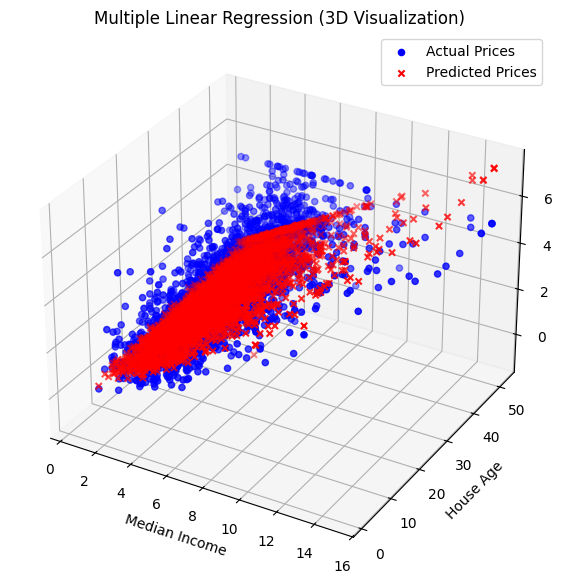

In [34]:
# 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for actual values
ax.scatter(X_test['MedInc'], X_test['HouseAge'], y_test, color='blue', label="Actual Prices")

# Scatter plot for predicted values
ax.scatter(X_test['MedInc'], X_test['HouseAge'], y_pred, color='red', marker='x', label="Predicted Prices")

# Labels
ax.set_xlabel("Median Income")
ax.set_ylabel("House Age")
ax.set_zlabel("Median House Value")
ax.set_title("Multiple Linear Regression (3D Visualization)")

ax.legend()
plt.show()

### Polynomial Regression (Using MedInc to predict House Value)

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load dataset
california = datasets.fetch_california_housing(as_frame=True)
df = california.frame  

df.head() # Display first few rows


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


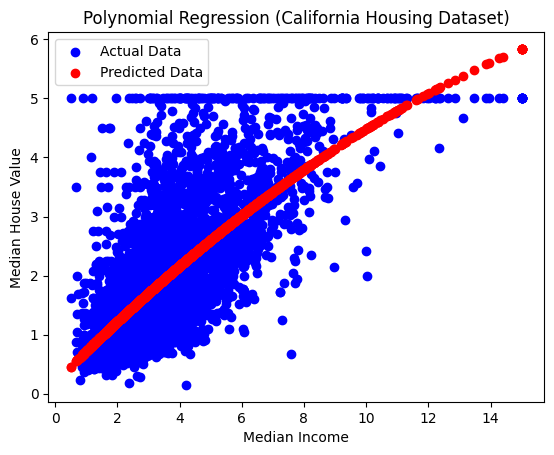

In [31]:

# Select one feature for polynomial regression
X = df[['MedInc']]
y = df['MedHouseVal']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial transformation
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict
y_pred = model.predict(X_test_poly)

# Visualization
plt.scatter(X_test, y_test, color='blue', label="Actual Data")
plt.scatter(X_test, y_pred, color='red', label="Predicted Data")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()
plt.title("Polynomial Regression (California Housing Dataset)")
plt.show()
